In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive


In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data = pd.read_csv('/content/drive/MyDrive/train_loan.csv')

In [5]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
#replace Nan values with zero

In [7]:
data.fillna(0,inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,141.166124,334.201954,0.773616
std,6109.041673,2926.248369,88.340630,82.183884,0.418832
min,150.000000,0.000000,0.000000,0.000000,0.000000
25%,2877.500000,0.000000,98.000000,360.000000,1.000000
50%,3812.500000,1188.500000,125.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [10]:
data.isna().sum()


,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


missing value handling

In [11]:
data['Gender'].fillna(value=data['Gender'].mode()[0],inplace=True)
data['Married'].fillna(data['Married'].mode()[0],inplace= True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace= True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace= True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].median(),inplace=True)


<ipython-input-11-5e197d43b07b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Gender'].fillna(value=data['Gender'].mode()[0],inplace=True)
<ipython-input-11-5e197d43b07b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [12]:
data.isna().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [13]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
609,False
610,False
611,False
612,False


detecting and eleminating outliers

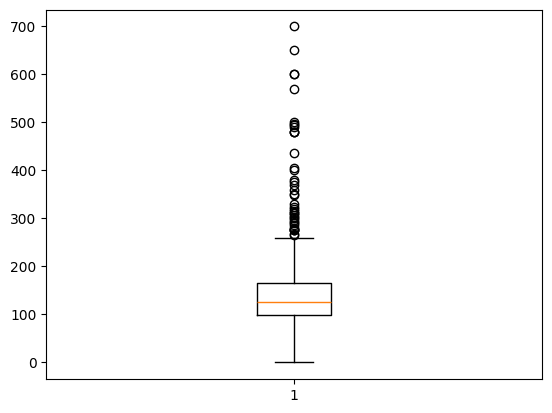

In [14]:
plt.boxplot(data['LoanAmount'])
plt.show()

In [15]:
q1 = data['LoanAmount'].quantile(0.25)
q3 = data['LoanAmount'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
data = data[data['LoanAmount'] < upper_bound]
data = data[data['LoanAmount'] > lower_bound]


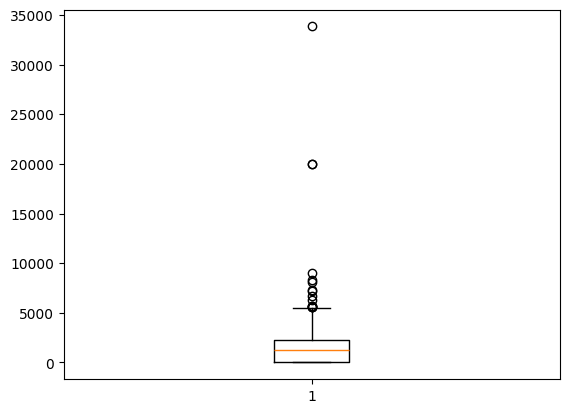

In [16]:
plt.boxplot(data['CoapplicantIncome'])
plt.show()

In [17]:
q1 = data['CoapplicantIncome'].quantile(0.25)
q3 = data['CoapplicantIncome'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
data = data[data['CoapplicantIncome'] < upper_bound]



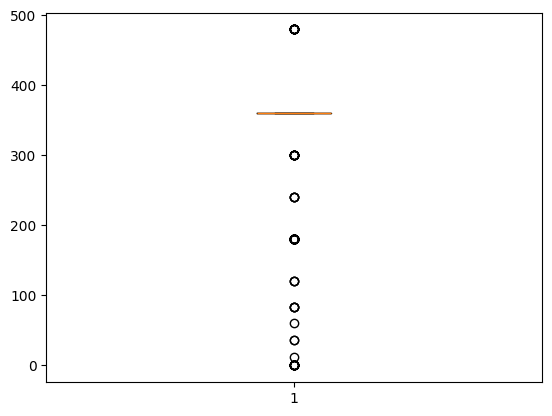

In [18]:
plt.boxplot(data['Loan_Amount_Term'])
plt.show()

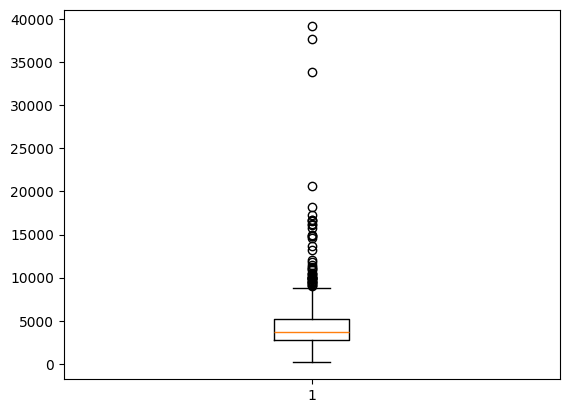

In [19]:
plt.boxplot(data['ApplicantIncome'])
plt.show()

In [20]:
q1 = data['ApplicantIncome'].quantile(0.25)
q3 = data['ApplicantIncome'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
data = data[data['ApplicantIncome'] < upper_bound]


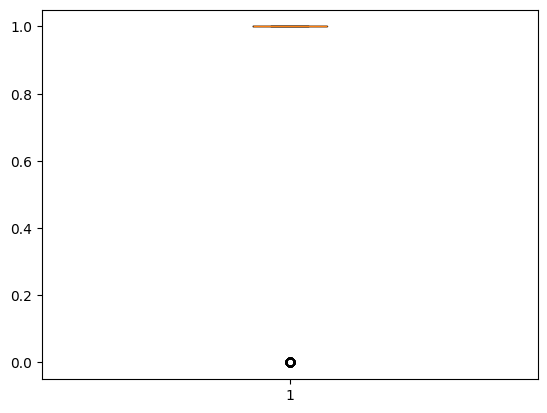

In [21]:
plt.boxplot(data['Credit_History'])
plt.show()

In [22]:
#encoding
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
data['Gender'] = data['Gender'].astype(str)
data['Gender'] = le.fit_transform(data['Gender'])

In [23]:
data['Married'] = data['Gender'].astype(str)
data['Married'] = le.fit_transform(data['Married'])

In [24]:
data['Dependents'] = data['Dependents'].astype(str)
data['Dependents'] = le.fit_transform(data['Dependents'])

In [25]:
data['Education'] = data['Education'].astype(str)
data['Education'] = le.fit_transform(data['Education'])

In [26]:
data['Self_Employed'] = data['Self_Employed'].astype(str)
data['Self_Employed'] = le.fit_transform(data['Self_Employed'])

In [27]:
data['Property_Area'] = data['Property_Area'].astype(str)
data['Property_Area'] = le.fit_transform(data['Property_Area'])

In [28]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,2,2,0,0,1,5849,0.0,0.0,360.0,1.0,2,Y
1,LP001003,2,2,1,0,1,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,2,2,0,0,2,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,2,2,0,1,1,2583,2358.0,120.0,360.0,1.0,2,Y
4,LP001008,2,2,0,0,1,6000,0.0,141.0,360.0,1.0,2,Y


In [29]:
#scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data['ApplicantIncome'] = scaler.fit_transform(data[['ApplicantIncome']])
data['CoapplicantIncome'] = scaler.fit_transform(data[['CoapplicantIncome']])
data['LoanAmount'] = scaler.fit_transform(data[['LoanAmount']])
